In [124]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import numpy as np

In [10]:
df = pd.read_csv('LabPON_flattened_metadata.csv')

Ok it looks like we have ~600 multi-specimen cases...

In [11]:
df['specimen'].value_counts()


I       4812
II       606
III      146
IV        45
V         13
VI        12
VII        3
VIII       2
IX         2
X          1
Name: specimen, dtype: int64

In [13]:
cases = df['Casenaam'].unique()

In [118]:
com = []
combos = []
n = 0

In [95]:
df.head()

,Casenaam,Coupe,File nummer,Conclusion (EN),specimen,wsi,dermai_label
0,2021_002_1_0001,I-1,14284561_HE_1_20210728_111726,Combined Naevus,I,1,LOW_RISK
1,2021_002_1_0001,I-2,14284562_HE_2_20210728_111449,Combined Naevus,I,2,LOW_RISK
2,2021_002_1_0001,I-3,14284563_HE_3_20210728_105328,Combined Naevus,I,3,LOW_RISK
3,2021_002_1_0001,I-4,14284564_HE_4_20210728_105018,Combined Naevus,I,4,LOW_RISK
4,2021_002_1_0002,I-1,14284565_HE_5_20210728_104831,Nodular (solid) basal cell carcinoma,I,1,BCC


In [119]:
for case in cases:
    case_data = df[df['Casenaam'] == case] 
    if case_data['dermai_label'].unique().shape[0] != 1:
        n += len( case_data['dermai_label'])
        for label in case_data['dermai_label'].values:
            com.append(label)
        combo = '_'.join(np.sort(case_data['dermai_label'].unique()))
        combos.append(combo)

In [120]:
n

510

Wow... 500 of the 600 multispecimen cases have multiple diagnoses. That's a lot.

<AxesSubplot:>

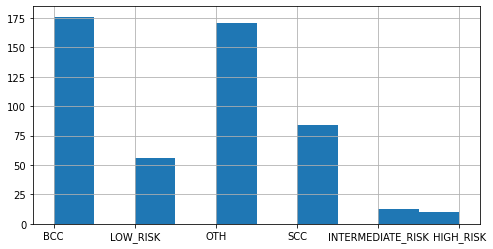

In [87]:
pd.DataFrame({'com':com})['com'].hist(figsize=(8, 4))

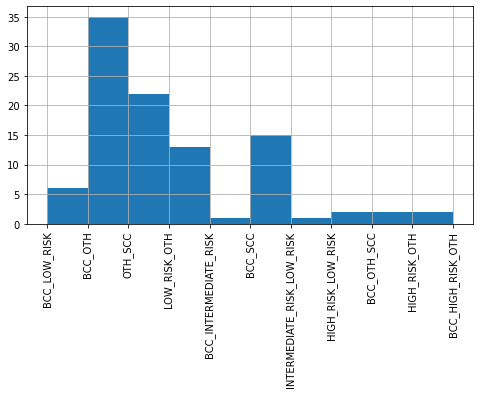

In [125]:
pd.DataFrame({'combos':combos})['combos'].hist(figsize=(8, 4))
plt.xticks(rotation='vertical')

plt.show()